In [1]:
# All the Includes

import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Getting Unique Authors


hot_df = pd.read_csv("../dataframes/praw_hot_submissions.csv")
new_df = pd.read_csv("../dataframes/praw_new_submissions.csv")
# utc timestamp to actual date time
hot_df['created_utc'] = pd.to_datetime(hot_df['created_utc'], unit='s', errors = 'coerce')
new_df['created_utc'] = pd.to_datetime(new_df['created_utc'], unit='s', errors = 'coerce')


new_df = new_df.sort_values(by='created_utc', ascending=True)

# Getting all unique users from HOT and NEW
unique_authors_new = new_df['author_name'].drop_duplicates(keep='first')
unique_authors_new = unique_authors_new.reset_index()
unique_authors_new = unique_authors_new.drop(columns="index")

unique_authors_hot = hot_df['author_name'].drop_duplicates(keep='first')
unique_authors_hot = unique_authors_hot.reset_index()
unique_authors_hot = unique_authors_hot.drop(columns="index")

unique_authors = pd.concat([unique_authors_new['author_name'], unique_authors_hot['author_name']])
unique_authors = unique_authors.drop_duplicates(keep='first')
unique_authors = unique_authors.reset_index()
unique_authors = unique_authors.drop(columns="index")

unique_authors.to_csv('../dataframes/unique_authors.csv')

In [3]:
unique_authors = pd.read_csv('../dataframes/unique_authors.csv')
unique_authors = unique_authors.loc[:, ~unique_authors.columns.str.match('Unnamed')]
unique_authors

,author_name
0,NirpUmbrella
1,MaxwellHillbilly
2,DiggleDaddy666
3,UnseenMaDaFaKa
4,ThirdPartyMechanic
...,...
566,dergutehirt814
567,travinyle2
568,creamboy2623
569,bobdealin


In [8]:
# Preprocessing
submissions = pd.read_csv('../dataframes/praw_redditor_submissions.csv')
submissions.head(5)
submissions = submissions.loc[:, ~submissions.columns.str.match('Unnamed')]
# Remove Subreddit == None
index = submissions[((submissions['subreddit'] == "none"))].index
submissions = submissions.drop(index)

data = submissions[['author_name', 'subreddit']]
data = data.groupby(['subreddit']).count()
data = data.rename(columns={"author_name": "number of submissions"})
# data = data.drop_duplicates(subset='author_name', ignore_index=True)
data = data.sort_values(by="number of submissions", ascending=False)
data.head(25)

,number of submissions
subreddit,
conspiracy,8553
AskReddit,496
conspiracy_commons,338
Wallstreetsilver,320
ChurchOfCOVID,203
CoronavirusCirclejerk,158
Conservative,156
memes,156
FringeTheory,132


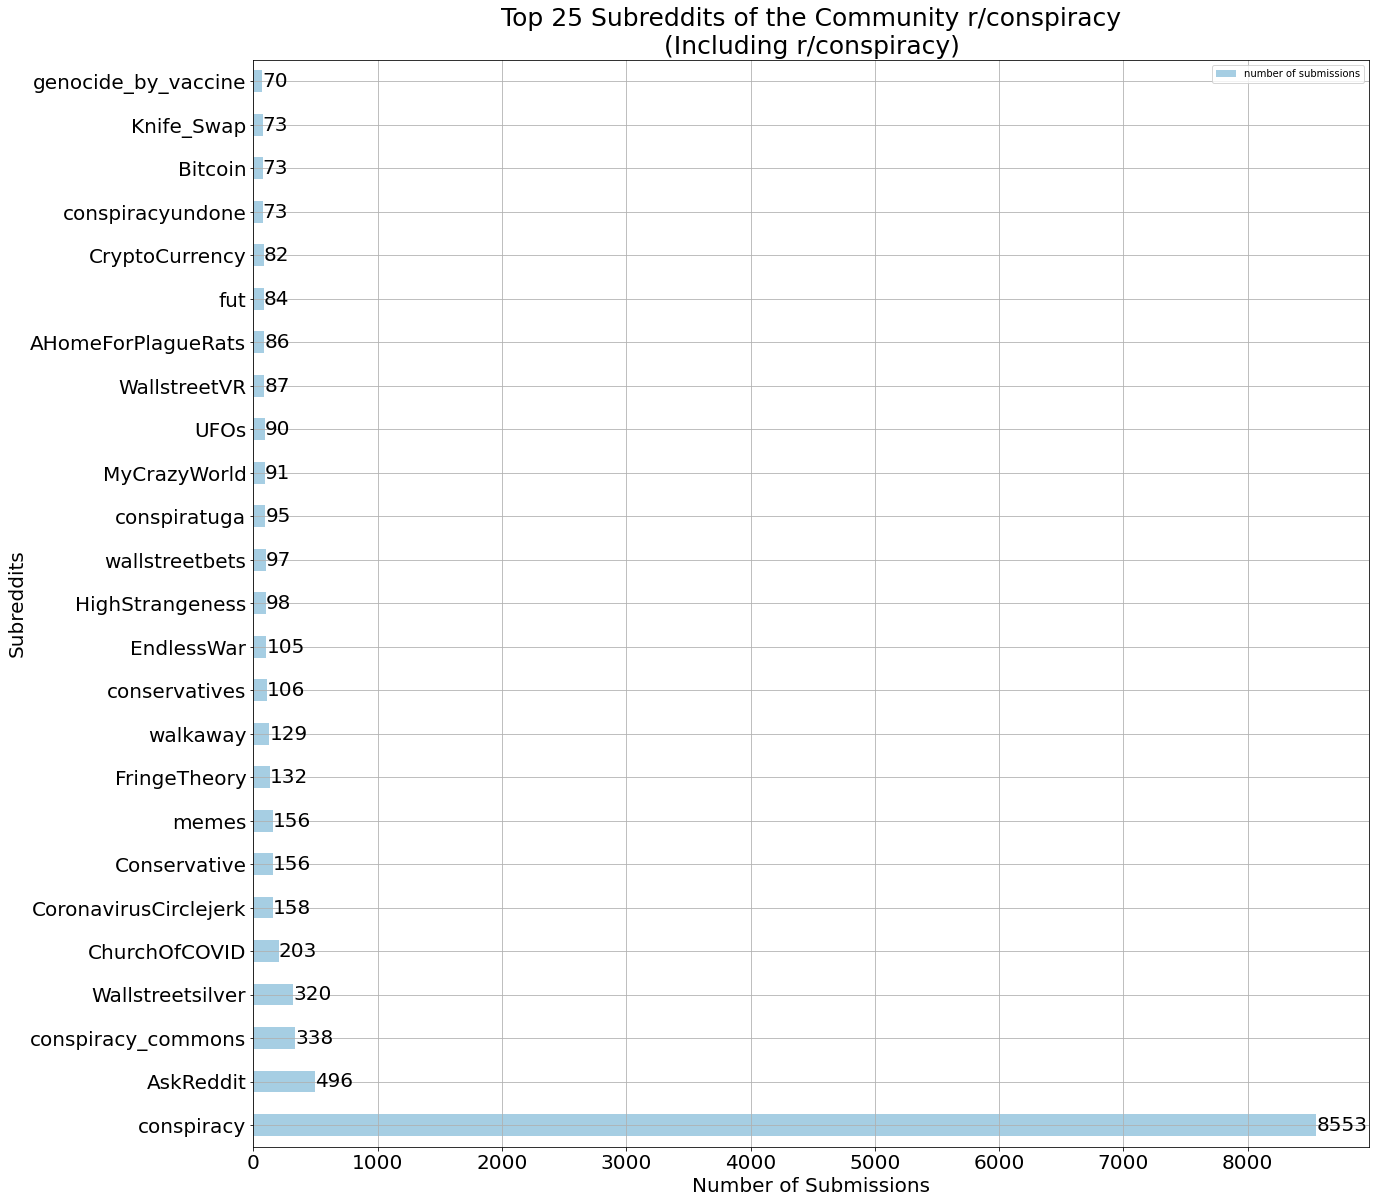

In [21]:
# Plotting - With the original Subreddit r/conspiracy
sample = 25
ax = data.nlargest(columns='number of submissions', n=25).plot(kind='barh', grid=True, figsize=(20, 20),
                                                               fontsize=20, color=plt.cm.Paired(np.arange(len(data))))
for container in ax.containers:
    ax.bar_label(container, fontsize=20)
plt.title('Top ' + str(sample) + " Subreddits from the Community of r/conspiracy\n(Including r/conspiracy)", fontsize=25)
plt.xlabel("Number of Submissions", fontsize=20)
plt.ylabel("Subreddits", fontsize=20)
plt.show()

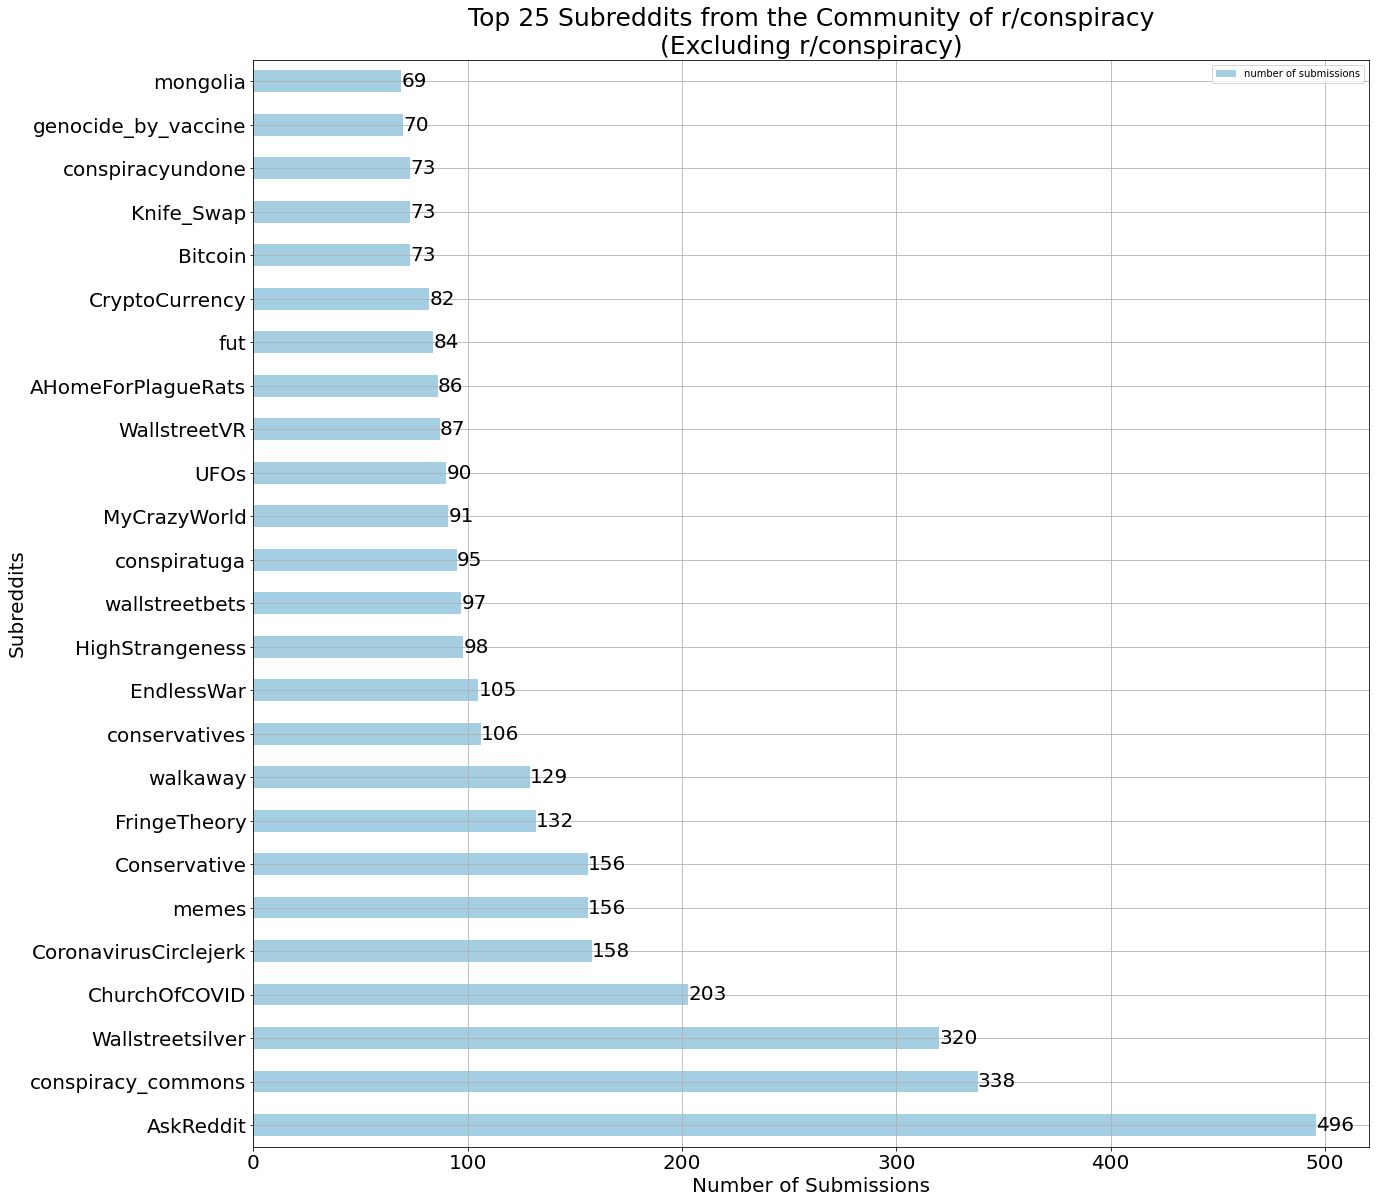

In [26]:
# Plotting - Without the original Subreddit r/conspiracy
# Remove r/conspiracy
index = submissions[((submissions['subreddit'] == "conspiracy"))].index
submissions = submissions.drop(index)

data = submissions[['author_name', 'subreddit']]
data = data.groupby(['subreddit']).count()
data = data.rename(columns={"author_name": "number of submissions"})
data = data.sort_values(by="number of submissions", ascending=False)

# Plotting
ax = data.nlargest(columns='number of submissions', n=25).plot(kind='barh', grid=True, figsize=(20, 20), fontsize=20,
                                                              color=plt.cm.Paired(np.arange(len(data))))
for container in ax.containers:
    ax.bar_label(container, fontsize=20)
plt.title('Top ' + str(sample) + " Subreddits from the Community of r/conspiracy\n(Excluding r/conspiracy)", fontsize=25)
plt.xlabel("Number of Submissions", fontsize=20)
plt.ylabel("Subreddits", fontsize=20)
plt.show()